In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df = dataset.copy()

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## Exploratory Data Analysis
Our aim is to predict Fire Weather Index(FWI) which depends on meterologial conditions.

In [5]:
##Drop unnecessary columns
df.drop(['day','month','year'], axis = 1, inplace = True)

Encoding Categorical Feature

In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

Visulaisations

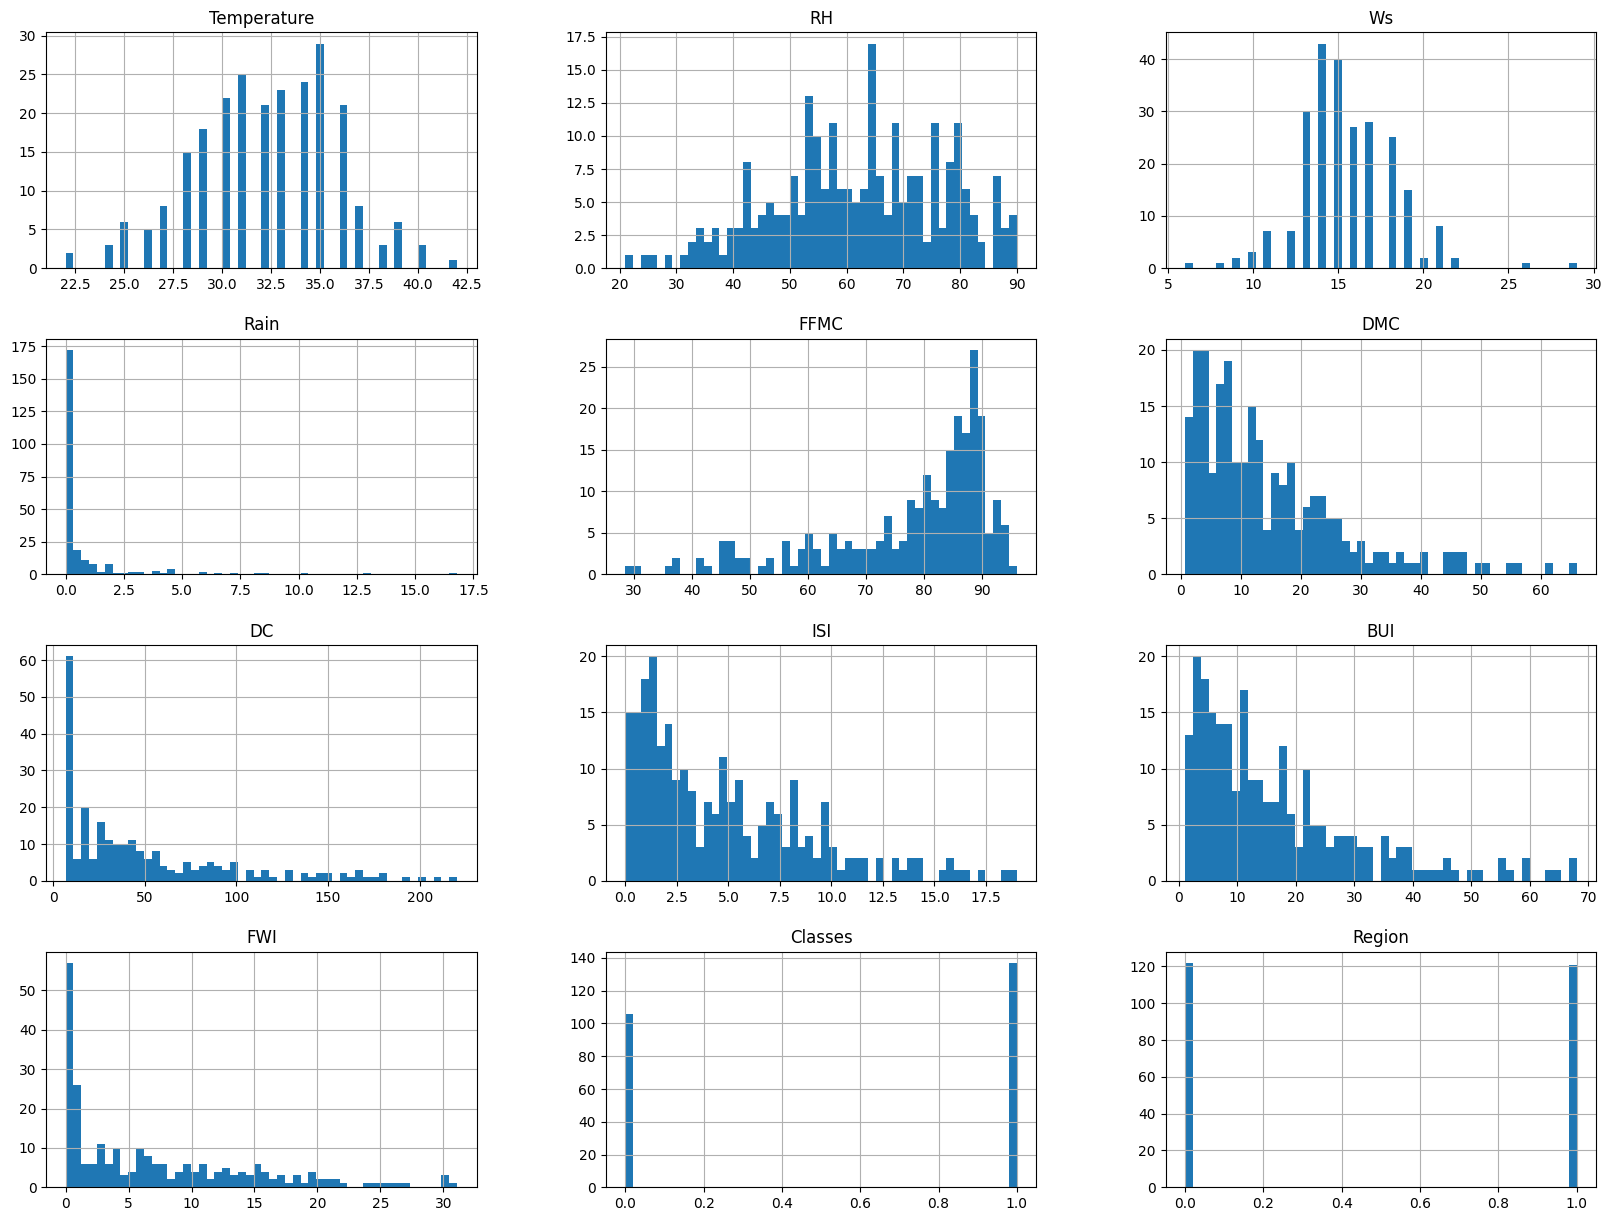

In [9]:
# plt.style.use('seaborn')
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
## Percentage for pie chart
percentage = df['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

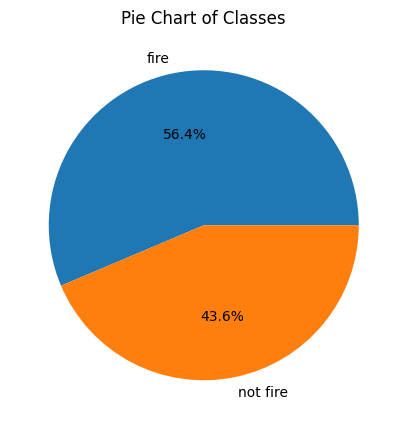

In [11]:
classes = ['fire','not fire']
plt.figure(figsize=(5,10))
plt.pie(percentage, labels=classes,autopct='%1.1f%%')
plt.title('Pie Chart of Classes')
plt.show()

In [12]:
## Correlations 
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

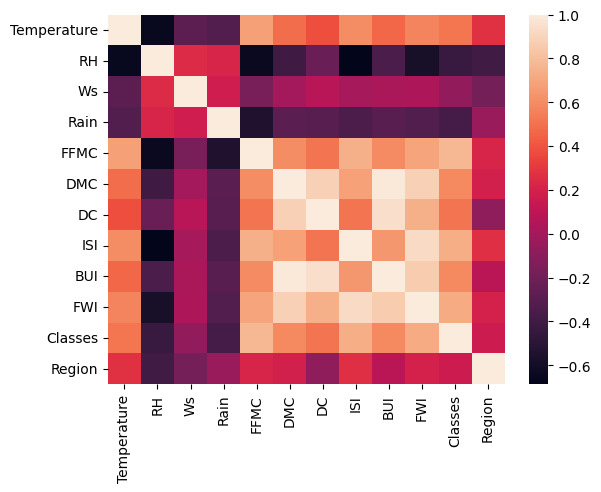

In [13]:
sns.heatmap(df.corr())

<Axes: ylabel='FWI'>

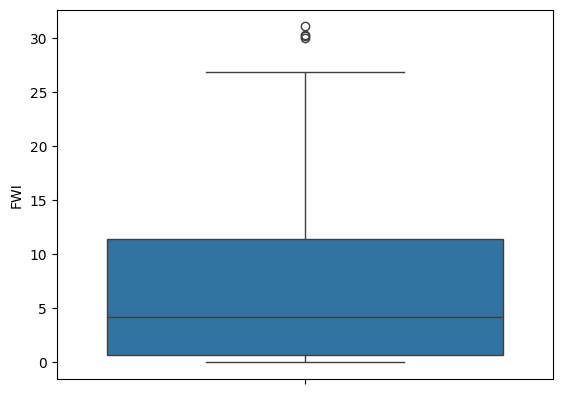

In [14]:
sns.boxplot(df['FWI'])

In [23]:
temp_df = dataset.loc[df['Region'] == 1]

In [22]:
dataset['Classes'] = np.where(dataset['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi Bel Region')

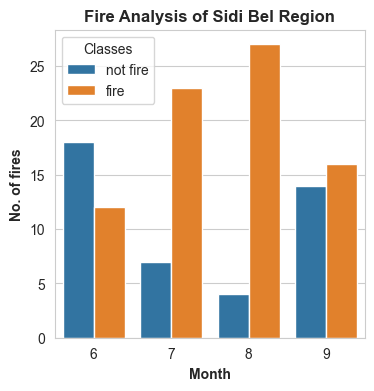

In [26]:
plt.figure(figsize=(4,4))
sns.countplot(x='month',hue='Classes', data = temp_df)
sns.set_style('whitegrid')
plt.xlabel('Month',weight = 'bold')
plt.ylabel("No. of fires", weight = 'bold')
plt.title("Fire Analysis of Sidi Bel Region", weight = 'bold')


Text(0.5, 1.0, 'Fire Analysis of Bajaia Region')

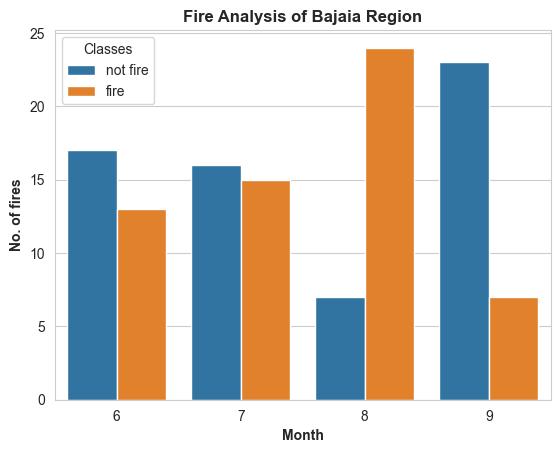

In [27]:
temp_df = dataset[dataset['Region'] == 0]
sns.countplot(x='month',hue='Classes',data = temp_df)
sns.set_style('whitegrid')
plt.xlabel('Month',weight = 'bold')
plt.ylabel("No. of fires", weight = 'bold')
plt.title("Fire Analysis of Bajaia Region", weight = 'bold')

In [33]:
temp_df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,0
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,0
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,0
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,0


In both the regions most of the forest fires occur in month of July and August

Text(0.5, 1.0, 'Bajia Regions')

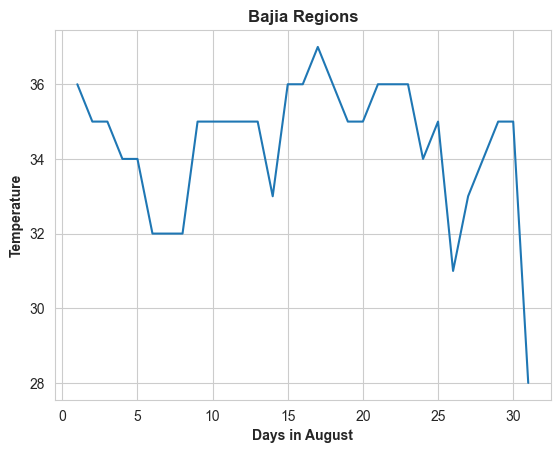

In [40]:
plt.plot(temp_df[temp_df['month']==8]['day'],temp_df[temp_df['month']==8]['Temperature'])
plt.xlabel('Days in August', weight = 'bold')
plt.ylabel('Temperature', weight = 'bold')
plt.title('Bajia Regions', weight = 'bold')

Text(0.5, 1.0, 'Bajaia Regions')

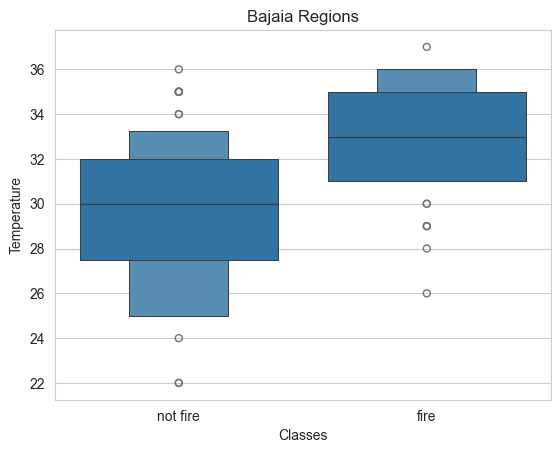

In [ ]:
sns.boxplot(x='Classes',y='Temperature',data=temp_df)
plt.title('Bajaia Regions')

In [45]:
temp_df = dataset.loc[dataset['Region'] == 1]
temp_df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


Text(0.5, 1.0, 'SidiBel Regions')

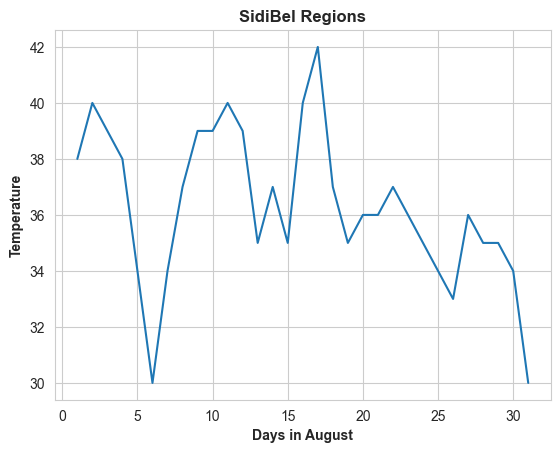

In [49]:
plt.plot('day','Temperature',data=temp_df[temp_df['month'] == 8])
plt.xlabel('Days in August', weight = 'bold')
plt.ylabel('Temperature', weight = 'bold')
plt.title('SidiBel Regions', weight = 'bold')

<Axes: xlabel='Classes', ylabel='Temperature'>

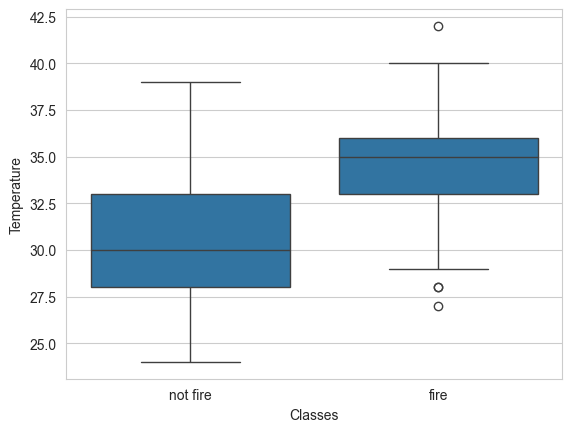

In [50]:
sns.boxplot(x='Classes',y='Temperature',data=temp_df)